In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from random import randint
from time import sleep
import pandas as pd
import requests
from pandas.io.json import json_normalize
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from matplotlib.lines import Line2D


In [2]:
audio = pd.read_excel('final_result.xlsx')

In [3]:
audio.head()

,Unnamed: 0,artist,title,duration_ms,acousticness,danceability,energy,tempo,instrumentalness,speechiness,liveness,valence,mode,key,time_signature,loudness,id
0,0,Bon Jovi,Livin' On A Prayer,249293,0.07780,0.532,0.887,122.511,0.000214,0.0335,0.2940,0.795,1,0,4,-3.757,37ZJ0p5Jm13JPevGcx4SkF
1,1,Rose Royce,Wishing on a Star,291760,0.71600,0.333,0.422,97.305,0.000041,0.0527,0.0455,0.553,0,5,4,-15.171,0u2CGItUO2jYEiFaXD7n5S
2,2,Muse,Supremacy,295373,0.00451,0.256,0.679,158.718,0.040900,0.0387,0.1720,0.325,0,9,4,-4.495,40pPI2TbaYSZlKfV44HRjn
3,3,Whigfield,Saturday Night - Radio Mix,247406,0.04490,0.728,0.784,129.981,0.091800,0.0379,0.0964,0.964,1,11,4,-11.776,59VRFpPnC8pOhIH2WCWXF9
4,4,Eminem,The Real Slim Shady,284200,0.03020,0.949,0.661,104.504,0.000000,0.0572,0.0454,0.760,0,5,4,-4.244,3yfqSUWxFvZELEM4PmlwIR


In [4]:
audio.drop(['Unnamed: 0'],axis=1,inplace=True)



In [5]:
audio.head()

,artist,title,duration_ms,acousticness,danceability,energy,tempo,instrumentalness,speechiness,liveness,valence,mode,key,time_signature,loudness,id
0,Bon Jovi,Livin' On A Prayer,249293,0.07780,0.532,0.887,122.511,0.000214,0.0335,0.2940,0.795,1,0,4,-3.757,37ZJ0p5Jm13JPevGcx4SkF
1,Rose Royce,Wishing on a Star,291760,0.71600,0.333,0.422,97.305,0.000041,0.0527,0.0455,0.553,0,5,4,-15.171,0u2CGItUO2jYEiFaXD7n5S
2,Muse,Supremacy,295373,0.00451,0.256,0.679,158.718,0.040900,0.0387,0.1720,0.325,0,9,4,-4.495,40pPI2TbaYSZlKfV44HRjn
3,Whigfield,Saturday Night - Radio Mix,247406,0.04490,0.728,0.784,129.981,0.091800,0.0379,0.0964,0.964,1,11,4,-11.776,59VRFpPnC8pOhIH2WCWXF9
4,Eminem,The Real Slim Shady,284200,0.03020,0.949,0.661,104.504,0.000000,0.0572,0.0454,0.760,0,5,4,-4.244,3yfqSUWxFvZELEM4PmlwIR


In [6]:
audio.set_index(['id'],inplace=True)

In [7]:
audio.keys()

Index(['artist', 'title', 'duration_ms', 'acousticness', 'danceability',
       'energy', 'tempo', 'instrumentalness', 'speechiness', 'liveness',
       'valence', 'mode', 'key', 'time_signature', 'loudness'],
      dtype='object')

In [8]:
audio_features = audio[['duration_ms', 'acousticness', 'danceability',
       'energy', 'tempo', 'instrumentalness', 'speechiness', 'liveness',
       'valence', 'mode', 'key', 'time_signature', 'loudness']]

In [9]:
audio_features.head()

,duration_ms,acousticness,danceability,energy,tempo,instrumentalness,speechiness,liveness,valence,mode,key,time_signature,loudness
id,,,,,,,,,,,,,
37ZJ0p5Jm13JPevGcx4SkF,249293,0.07780,0.532,0.887,122.511,0.000214,0.0335,0.2940,0.795,1,0,4,-3.757
0u2CGItUO2jYEiFaXD7n5S,291760,0.71600,0.333,0.422,97.305,0.000041,0.0527,0.0455,0.553,0,5,4,-15.171
40pPI2TbaYSZlKfV44HRjn,295373,0.00451,0.256,0.679,158.718,0.040900,0.0387,0.1720,0.325,0,9,4,-4.495
59VRFpPnC8pOhIH2WCWXF9,247406,0.04490,0.728,0.784,129.981,0.091800,0.0379,0.0964,0.964,1,11,4,-11.776
3yfqSUWxFvZELEM4PmlwIR,284200,0.03020,0.949,0.661,104.504,0.000000,0.0572,0.0454,0.760,0,5,4,-4.244


In [10]:
transformer = MinMaxScaler().fit(audio_features)
audio_features_scaler = transformer.transform(audio_features)
audio_features_scaled = pd.DataFrame(audio_features_scaler, columns=audio_features.columns)

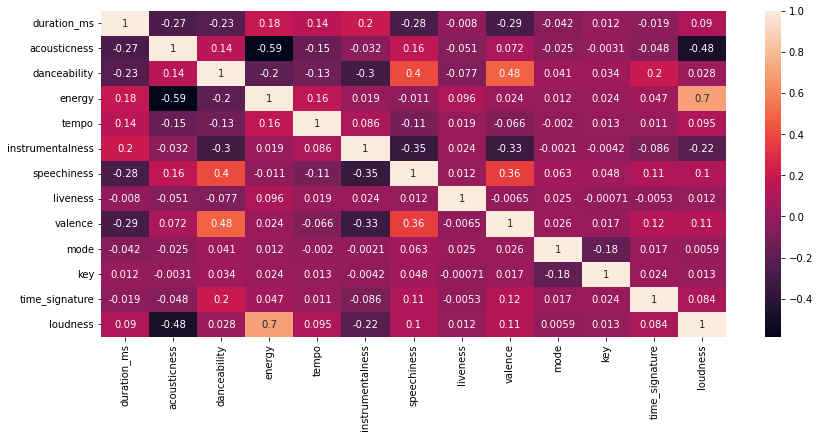

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14,6))
ax=sns.heatmap(audio_features_scaled.corr(), annot=True)
plt.show()



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

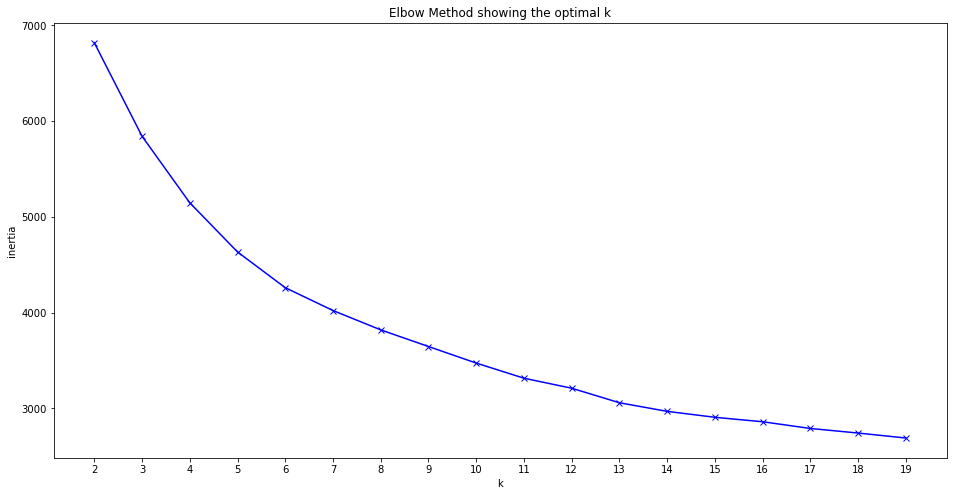

In [35]:
import numpy as np
from sklearn.cluster import KMeans

K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1337)
    kmeans.fit(audio_features_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Slhouette score showing the optimal k')

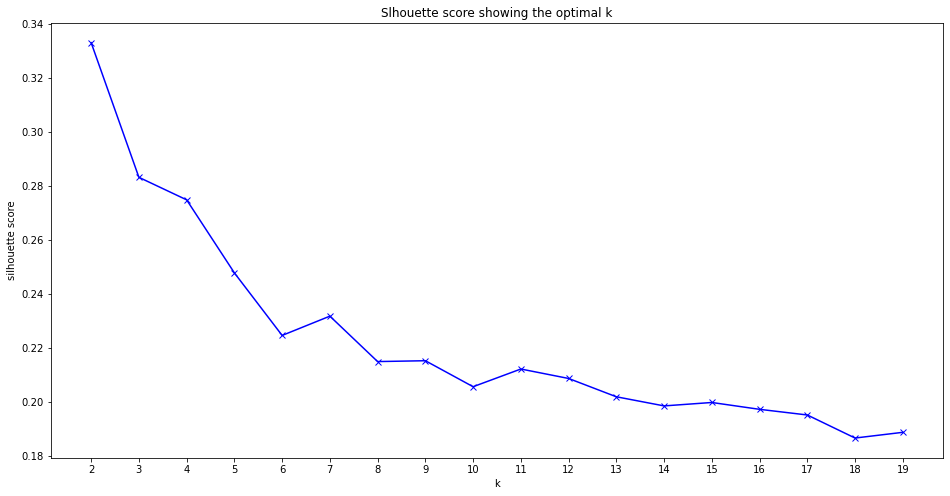

In [34]:
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1337)
    kmeans.fit(audio_features_scaled)
    silhouette.append(silhouette_score(audio_features_scaled, kmeans.predict(audio_features_scaled)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Slhouette score showing the optimal k')

In [17]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=7, random_state=1234)
kmeans.fit(audio_features_scaled)

KMeans(n_clusters=7, random_state=1234)

In [19]:
clusters = kmeans.predict(audio_features_scaled)  # Predicting the clusters:
pd.Series(clusters).value_counts().sort_index()  # Checking the size of the clusters



0    2071
1    2277
2     540
3    1482
4    3106
5    2081
6    2774
dtype: int64

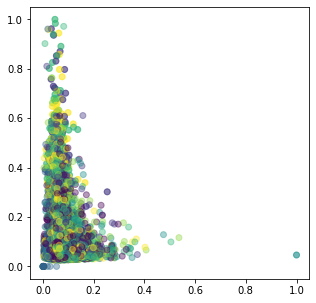

In [23]:
plt.figure(figsize=(5, 5))
plt.scatter(audio_features_scaled.iloc[:, 0], audio_features_scaled.iloc[:, 6], c=clusters,alpha=0.40)
plt.show()



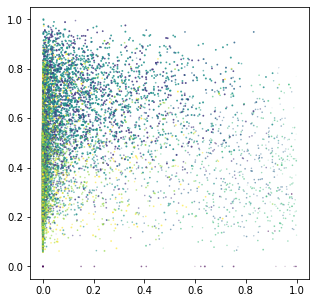

In [47]:
from sklearn import cluster

agglomerative = cluster.AgglomerativeClustering(n_clusters=7,linkage='complete')
pred = agglomerative.fit_predict(audio_features_scaled)

plt.figure(figsize=(5, 5))
plt.scatter(audio_features_scaled.iloc[:, 1], audio_features_scaled.iloc[:, 2],audio_features_scaled.iloc[:, 3], c=pred,alpha=0.5)
plt.show()